### Exercicis d'anàlisi de sentiment i textos.

### Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [114]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#nltk.download('all')



El texto escogido para este análisis de sentimiento, es el speech de Dave Grohl, líder de Foo Fighters y ex batería de Nirvana, en el funeral de Lemmy Kilmister, líder de la banda de rock Motörhead.

Dave Grohl comparte sus experiencias y recuerdos personales sobre Lemmy Kilmister, líder de la banda Motörhead. 
Revela la conexión personal y el profundo respeto que tenía por Lemmy, destacando no solo la figura icónica del rock sino también la humanidad y la amabilidad que Lemmy mostraba hacia los demás. 

La combinación de anécdotas divertidas y momentos emotivos, da un tono positivo y humorístico al discurso. 

In [115]:
from newspaper import Article

# Descargamos el texto directamente de la web donde se aloja utilizando "Article"

url = 'https://speakola.com/eulogy/for-lemmy-kilmister-dave-grohl-2016'

article = Article(url)

article.download()
article.parse()
article.nlp()

text = article.text
print(text)

10 January 2016, Forest Lawn Memorial Cemetery, Los Angeles, USA

The funeral streaming had technical difficulties during the amazing Dave Grohl eulogy. It's worth persevering, and the beautiful, tears-inducing Little Richard finale is in full sound from 7.00.

Hi guys

There’s not enough time for me to tell you how much Lemmy meant to me, and all the amazing experiences I had with him.

The first time I met Lemmy was at fucken Crazy Girls about twenty years ago, and I was walking back from the mens’ room, and on the way back, I looked to my left and I saw Lemmy by himself in the corner on a video game. And it blew my mind. I knew that I couldn’t just go say something because he was on his own in the corner. On the way out I thought, ‘I have to say something. He’s my hero. He’s the one true rock ’n ’roller that bridged my love of ACDC and Sabbath and Zeppelin with my love of GBH and the Ramones and Black Flag. So I walked up and said, ‘Excuse me Lemmy, I don’t want to bother you, but y

In [116]:
# convertimos todo el texto a minúsculas

text = text.lower()

# Tokenizamos el texto

tokenized_word=word_tokenize(text)

# eliminamos los signos de puntuación, números y otros caracteres no alfabéticos, dejando solo las palabras:

tokenized_word = [w for w in tokenized_word if w.isalpha()]

print(tokenized_word)

['january', 'forest', 'lawn', 'memorial', 'cemetery', 'los', 'angeles', 'usa', 'the', 'funeral', 'streaming', 'had', 'technical', 'difficulties', 'during', 'the', 'amazing', 'dave', 'grohl', 'eulogy', 'it', 'worth', 'persevering', 'and', 'the', 'beautiful', 'little', 'richard', 'finale', 'is', 'in', 'full', 'sound', 'from', 'hi', 'guys', 'there', 's', 'not', 'enough', 'time', 'for', 'me', 'to', 'tell', 'you', 'how', 'much', 'lemmy', 'meant', 'to', 'me', 'and', 'all', 'the', 'amazing', 'experiences', 'i', 'had', 'with', 'him', 'the', 'first', 'time', 'i', 'met', 'lemmy', 'was', 'at', 'fucken', 'crazy', 'girls', 'about', 'twenty', 'years', 'ago', 'and', 'i', 'was', 'walking', 'back', 'from', 'the', 'mens', 'room', 'and', 'on', 'the', 'way', 'back', 'i', 'looked', 'to', 'my', 'left', 'and', 'i', 'saw', 'lemmy', 'by', 'himself', 'in', 'the', 'corner', 'on', 'a', 'video', 'game', 'and', 'it', 'blew', 'my', 'mind', 'i', 'knew', 'that', 'i', 'couldn', 't', 'just', 'go', 'say', 'something', 'b

In [117]:
# Calculamos la frecuencia de las palabaras


from nltk import FreqDist


fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 356 samples and 939 outcomes>


In [118]:
# Dataframe con las palabras más comunes y sus frecuencias

word_df = pd.DataFrame(fdist.most_common(30))   # escogemos las 30 palabras más repetidas
word_df.columns = ['Palabras_comunes','Frecuencia']
word_df


,Palabras_comunes,Frecuencia
0,and,55
1,i,43
2,the,37
3,my,26
4,to,23
5,he,21
6,it,16
7,s,16
8,was,16
9,a,15


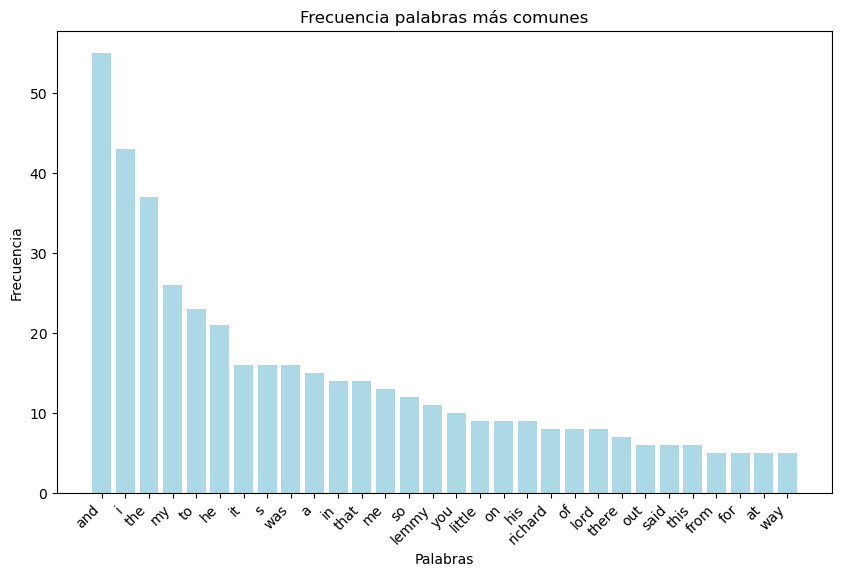

In [119]:
import matplotlib.pyplot as plt

# Hacemos un gráfico de barras

plt.figure(figsize=(10, 6))
plt.bar(word_df['Palabras_comunes'], word_df['Frecuencia'], color='lightblue')
plt.title('Frecuencia palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  
plt.show()

Podemos generar también un wordcloud (Nube de palabras):

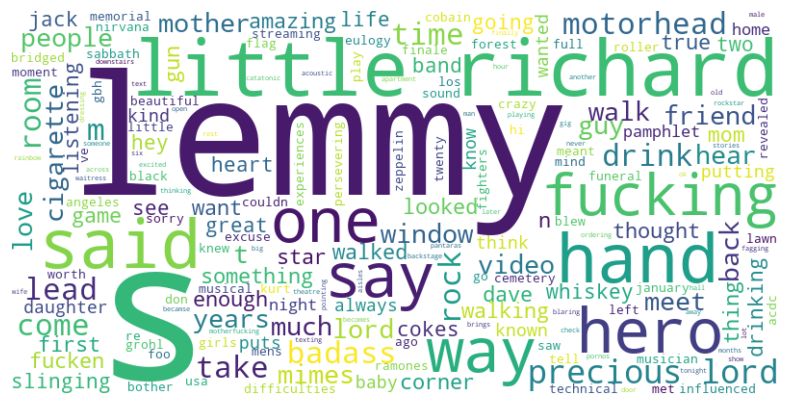

In [128]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtenemos el texto procesado y tokenizado
text = "tokenized_word" 

# Creamos WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokenized_word))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Las palabras más frecuentes en el texto aparecen más grandes y las menos frecuentes aparecen más pequeñas.

### Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [121]:
# Obtenemos la lista de stopwords, que si están en el texto serán eliminadas después al procesarlo

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
print(stop_words)

{'they', 'nor', 'couldn', 'until', 'his', 'than', 'shouldn', 'through', 'hers', 'herself', 'own', 'himself', 'mightn', 'down', 'any', "wouldn't", 'or', 'having', 'had', 'in', 'she', 'who', 'if', 'both', 'why', 'a', 'yourself', 'didn', 'here', 'some', 'needn', 'o', 'how', "couldn't", 'each', 'just', 'then', 'all', "wasn't", 'hadn', 'been', 'those', 'can', 'on', 'not', 'him', 'after', 'them', 'during', 'shan', 'over', 'under', "mightn't", 'the', 'isn', "you'll", "haven't", 'd', 'its', 'further', 'did', 'to', 'once', 'where', 'yours', 'most', 'don', 'only', 'which', 'her', 'but', 'out', 'he', 'it', 'itself', 'me', 'ma', 'by', 'm', 'your', 'has', 'before', "isn't", 'my', 'was', "weren't", 'same', 'themselves', 'as', 'and', 'being', 'should', 'above', 'that', 'ours', 's', 've', 'mustn', 'up', 'with', 'at', "you're", 'very', 'while', 'too', 'is', 'there', 'now', "needn't", 'such', 'will', "hasn't", 'doing', 'are', 'again', "should've", 'more', "shan't", 'about', 'haven', "you'd", 'wasn', 'no

In [122]:
# Eliminamos las stopwords. 

filtered_word = [w for w in tokenized_word if w not in stop_words]

print("Palabras tokenizadas:",tokenized_word)
print("Palabras filtradas:",filtered_word)

Palabras tokenizadas: ['january', 'forest', 'lawn', 'memorial', 'cemetery', 'los', 'angeles', 'usa', 'the', 'funeral', 'streaming', 'had', 'technical', 'difficulties', 'during', 'the', 'amazing', 'dave', 'grohl', 'eulogy', 'it', 'worth', 'persevering', 'and', 'the', 'beautiful', 'little', 'richard', 'finale', 'is', 'in', 'full', 'sound', 'from', 'hi', 'guys', 'there', 's', 'not', 'enough', 'time', 'for', 'me', 'to', 'tell', 'you', 'how', 'much', 'lemmy', 'meant', 'to', 'me', 'and', 'all', 'the', 'amazing', 'experiences', 'i', 'had', 'with', 'him', 'the', 'first', 'time', 'i', 'met', 'lemmy', 'was', 'at', 'fucken', 'crazy', 'girls', 'about', 'twenty', 'years', 'ago', 'and', 'i', 'was', 'walking', 'back', 'from', 'the', 'mens', 'room', 'and', 'on', 'the', 'way', 'back', 'i', 'looked', 'to', 'my', 'left', 'and', 'i', 'saw', 'lemmy', 'by', 'himself', 'in', 'the', 'corner', 'on', 'a', 'video', 'game', 'and', 'it', 'blew', 'my', 'mind', 'i', 'knew', 'that', 'i', 'couldn', 't', 'just', 'go', 

Hemos eliminado las stopwords del conjunto de palabras tokenizadas. 

Podemos comprobarlo al comparar las palabras tokenizdas con las filtradas. Por ejemplo, en las primeras líneas se observa que stopwords como 'the', 'had', 'it', 'and' han sido correctamente eliminadas.

In [123]:
# Hacemos stemming. Se reducen las palabras a sus raíces, eliminando sufijos y prefijos. Reduce la variablilidad en el texto.

from nltk.stem import PorterStemmer


ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Palabras filtradas:",filtered_word)
print("Palabras estemizadas:",stemmed_words)

Palabras filtradas: ['january', 'forest', 'lawn', 'memorial', 'cemetery', 'los', 'angeles', 'usa', 'funeral', 'streaming', 'technical', 'difficulties', 'amazing', 'dave', 'grohl', 'eulogy', 'worth', 'persevering', 'beautiful', 'little', 'richard', 'finale', 'full', 'sound', 'hi', 'guys', 'enough', 'time', 'tell', 'much', 'lemmy', 'meant', 'amazing', 'experiences', 'first', 'time', 'met', 'lemmy', 'fucken', 'crazy', 'girls', 'twenty', 'years', 'ago', 'walking', 'back', 'mens', 'room', 'way', 'back', 'looked', 'left', 'saw', 'lemmy', 'corner', 'video', 'game', 'blew', 'mind', 'knew', 'go', 'say', 'something', 'corner', 'way', 'thought', 'say', 'something', 'hero', 'one', 'true', 'rock', 'n', 'roller', 'bridged', 'love', 'acdc', 'sabbath', 'zeppelin', 'love', 'gbh', 'ramones', 'black', 'flag', 'walked', 'said', 'excuse', 'lemmy', 'want', 'bother', 'influenced', 'much', 'musical', 'hero', 'musician', 'play', 'foo', 'fighters', 'nirvana', 'looked', 'video', 'game', 'first', 'thing', 'ever',

El stemming se ha realizado con éxito. Podemos comprobar cómo se han reducido las palabras. Por ejemplo: technic/technical y amaz/amazing

In [124]:
print(FreqDist(tokenized_word))
print(FreqDist(stemmed_words))

<FreqDist with 356 samples and 939 outcomes>
<FreqDist with 259 samples and 444 outcomes>


Al aplicar el stemming, la lista de palabras stemizadas se reduce y tienen una frecuencia menor. Se reduce el número de palabra únicas.

### Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

Utilizaremos 2 tipos de análisis de sentimiento: TextBlob y VADER Sentiment Intensity Analyzer

In [125]:
# TEXTBLOB (no analiza el contexto)

from textblob import TextBlob

# Creamos un texto a partir de las stemmed words
text_blob = TextBlob(" ".join(stemmed_words))

# Obtenemos la polaridad del sentimiento (-1 a 1)
sentiment_polarity = text_blob.sentiment.polarity

# Clasificamos el sentimiento en positivo, negativo o neutro
if sentiment_polarity > 0:
    sentiment_label = 'Positivo'
elif sentiment_polarity < 0:
    sentiment_label = 'Negativo'
else:
    sentiment_label = 'Neutro'

# Resultados
print("Texto con stemming:", " ".join(stemmed_words))
print("Puntuación de polaridad del sentimiento:", sentiment_polarity)
print("Etiqueta del sentimiento:", sentiment_label)


Texto con stemming: januari forest lawn memori cemeteri lo angel usa funer stream technic difficulti amaz dave grohl eulog worth persev beauti littl richard final full sound hi guy enough time tell much lemmi meant amaz experi first time met lemmi fucken crazi girl twenti year ago walk back men room way back look left saw lemmi corner video game blew mind knew go say someth corner way thought say someth hero one true rock n roller bridg love acdc sabbath zeppelin love gbh ramon black flag walk said excus lemmi want bother influenc much music hero musician play foo fighter nirvana look video game first thing ever said said sorri friend kurt cobain moment reveal badass motherfuck rock star gun sling whiskey drink badass mother fuck rockstar heart walk away think never see enough rest life becams friend one thing hero anoth hero becom friend year lot great stori go apart walk aisl porno go rainbow order two jack coke waitress bring two jack coke fuck male one time text say hey man band pl

La puntuación de polaridad en el análisis TextBlob es 0.1012962962962963, que indica una ligera inclinación hacia el lado positivo.  El texto tiende a tener un tono positivo, aunque la polaridad no es muy fuerte.

In [126]:
# ANALISIS INTENSIDAD SDEL SENTIMIENTO  VADER (analiza el contexto)

from nltk.sentiment import SentimentIntensityAnalyzer

# Creamos un texto a partir de las stemmed words
text = " ".join(stemmed_words)

# Tokenizamos las palabras
tokenized_words = word_tokenize(text)

# analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

# puntuación de polaridad del sentimiento
sentiment_scores = sia.polarity_scores(text)

# Puntuaciones específicas
positive_score = sentiment_scores['pos']
negative_score = sentiment_scores['neg']
neutral_score = sentiment_scores['neu']

# polaridad del sentimiento
sentiment_polarity = sentiment_scores['compound']

# Clasificamos el sentimiento en positivo, negativo o neutro
if sentiment_polarity > 0:
    sentiment_label = 'Positivo'
elif sentiment_polarity < 0:
    sentiment_label = 'Negativo'
else:
    sentiment_label = 'Neutro'


print("Texto con stemming:", text)
print("Puntuación de polaridad positiva:", positive_score)
print("Puntuación de polaridad negativa:", negative_score)
print("Puntuación de polaridad neutra:", neutral_score)
print("Puntuación de polaridad compuesta del sentimiento:", sentiment_polarity)
print("Etiqueta del sentimiento:", sentiment_label)


Texto con stemming: januari forest lawn memori cemeteri lo angel usa funer stream technic difficulti amaz dave grohl eulog worth persev beauti littl richard final full sound hi guy enough time tell much lemmi meant amaz experi first time met lemmi fucken crazi girl twenti year ago walk back men room way back look left saw lemmi corner video game blew mind knew go say someth corner way thought say someth hero one true rock n roller bridg love acdc sabbath zeppelin love gbh ramon black flag walk said excus lemmi want bother influenc much music hero musician play foo fighter nirvana look video game first thing ever said said sorri friend kurt cobain moment reveal badass motherfuck rock star gun sling whiskey drink badass mother fuck rockstar heart walk away think never see enough rest life becams friend one thing hero anoth hero becom friend year lot great stori go apart walk aisl porno go rainbow order two jack coke waitress bring two jack coke fuck male one time text say hey man band pl

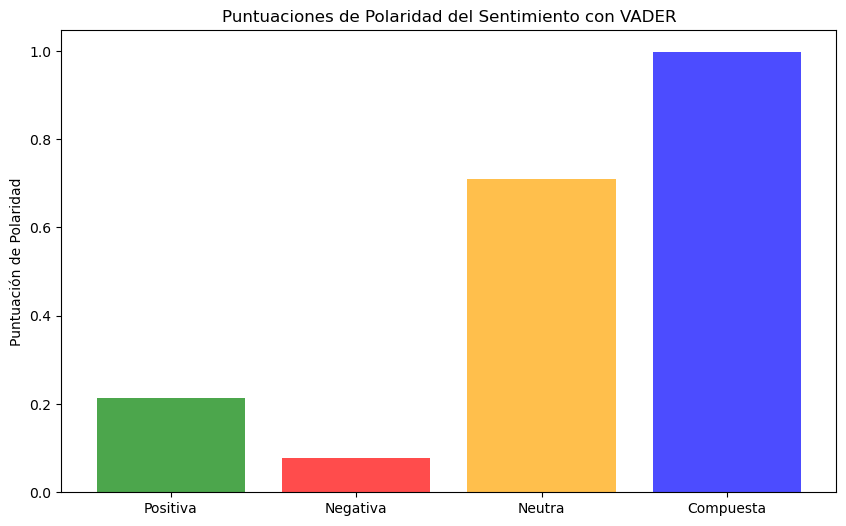

In [127]:
# Podemos graficar los resultados:

labels = ['Positiva', 'Negativa', 'Neutra', 'Compuesta']
scores = [positive_score, negative_score, neutral_score, sentiment_polarity]


plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['green', 'red', 'orange', 'blue'], alpha=0.7)


plt.ylabel('Puntuación de Polaridad')
plt.title('Puntuaciones de Polaridad del Sentimiento con VADER')

plt.show()


Se constata que el modelo VADER es más eficaz en la detección de sentimientos. El texto tiene una fuerte polaridad positiva, ya que la puntuación compuesta es muy cercana a 1. Sin embargo, también contiene alguna polaridad neutra como podemos ver en la puntuación de polaridad neutra de 0.71. La polaridad negativa es relativamente baja. En resumen, el sentimiento general del texto es positivo, con ciertos elementos neutros.

El modelo TextBlob no tiene esa capacidad de entender el contexto, y calcula la polaridad del sentimiento sumando la polaridad de las palabras individuales y después normaliza el resultado. De ahí que el resultado sea de 0.101296, igualmente positivo, se acerque más a la neutralidad. La interpretación de palabras sin tener en cuenta el contexto del texto reduce da un resultado menor que en la puntuación compuesta.

En definitiva, ambos modelos dan una evaluación positiva que coincide con la interpretación personal que ya teníamos, pero nos quedaremos con el análisis VADER. La interpretación del contexto y las emociones marca una notable diferencia en el resultado. 